In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing the dataset

In [106]:
dataset = pd.read_csv("Vehicle Maintenance- Service Records.csv")

In [107]:
x=dataset.iloc[:,[4,7,8]].values
y=dataset.iloc[:,[9,12,14,15,16,20,21,10,11,17,19,22,13]]
#y = [oil filter, dust and pollen filter, air clean filter, fuel filter, spark plugs, brake pads, clutch, engine oil, washer plug drain, brake fluid, brake and clutch oil, transmission fluid, coolant, wheel alignment]

In [108]:
print(y)

      oil_filter  dust_and_pollen_filter  air_clean_filter  fuel_filter  \
0              1                       0                 0            0   
1              1                       0                 0            0   
2              1                       0                 0            0   
3              1                       0                 0            0   
4              1                       0                 0            0   
...          ...                     ...               ...          ...   
1134           1                       1                 0            1   
1135           1                       1                 0            1   
1136           1                       0                 1            1   
1137           1                       0                 1            1   
1138           1                       1                 1            1   

      spark_plug  brake_pads  clutch  engine_oil  washer_plug_drain  \
0              0           0

In [109]:
print(x)

[['petrol' 10000 11400]
 ['petrol' 10000 11453]
 ['petrol' 10000 10706]
 ...
 ['diesel' 100000 106788]
 ['diesel' 100000 112576]
 ['diesel' 100000 110757]]


# Visualizing Data

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


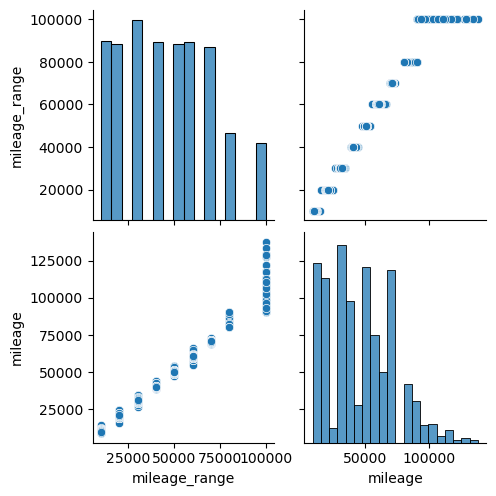

In [110]:
sns.pairplot(dataset[['engine_type','mileage_range','mileage']])
plt.show()


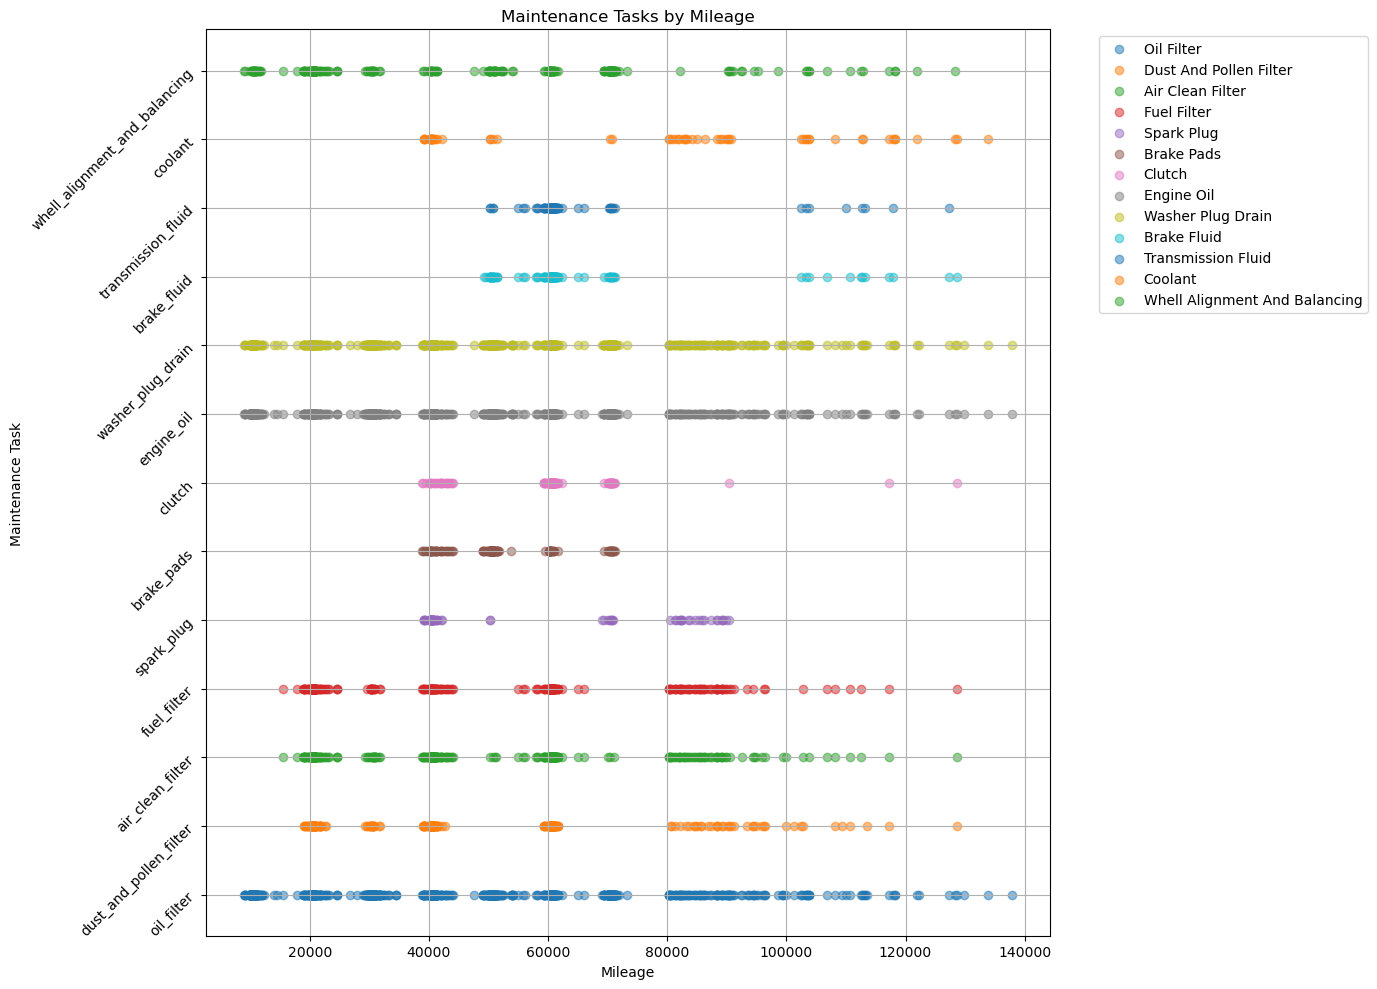

In [111]:
x_data = {
    'mileage': dataset['mileage']
}
additional_columns_indices = [9, 12, 14, 15, 16, 20, 21, 10, 11, 17, 19, 22, 13]
additional_columns = dataset.columns[additional_columns_indices]
x_data.update({col: dataset[col] for col in additional_columns})

dataVisualize = pd.DataFrame(x_data)

y_positions = {col: 1 + i*0.2 for i, col in enumerate(additional_columns)}

for col, y_pos in y_positions.items():
    marker_name = f"{col}_marker"
    dataVisualize[marker_name] = np.where(dataVisualize[col] > 0, y_pos, np.nan)

plt.figure(figsize=(14, 10))

for col, y_pos in y_positions.items():
    marker_name = f"{col}_marker"
    plt.scatter(dataVisualize['mileage'], dataVisualize[marker_name], alpha=0.5, label=col.replace('_', ' ').title())

y_ticks_values = list(y_positions.values())
y_ticks_labels = [col for col in additional_columns]
plt.yticks(y_ticks_values, y_ticks_labels, rotation=45)
plt.ylabel('Maintenance Task')
plt.xlabel('Mileage')
plt.title('Maintenance Tasks by Mileage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

# Label Encoding

In [112]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le = LabelEncoder()

x[:,0] = le1.fit_transform(x[:,0])
x[:,1] = le2.fit_transform(x[:,1])
x[:,2] = le3.fit_transform(x[:,2])


In [113]:
print(x)

[[1 0 92]
 [1 0 93]
 [1 0 60]
 ...
 [0 8 731]
 [0 8 736]
 [0 8 735]]


In [114]:
print(y)

      oil_filter  dust_and_pollen_filter  air_clean_filter  fuel_filter  \
0              1                       0                 0            0   
1              1                       0                 0            0   
2              1                       0                 0            0   
3              1                       0                 0            0   
4              1                       0                 0            0   
...          ...                     ...               ...          ...   
1134           1                       1                 0            1   
1135           1                       1                 0            1   
1136           1                       0                 1            1   
1137           1                       0                 1            1   
1138           1                       1                 1            1   

      spark_plug  brake_pads  clutch  engine_oil  washer_plug_drain  \
0              0           0

# Splitting Dataset into Training set and Test set

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Data preprocessing

In [116]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
imputer.fit(x[:,1:])
x[:,1:] = imputer.transform(x[:,1:])

In [117]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Importing RandomForestClassifier 

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

In [119]:
base_model = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=5, min_samples_leaf=4, random_state=0)
model = MultiOutputClassifier(base_model, n_jobs=-1)
model.fit(X_train, Y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=20,
                                                       min_samples_leaf=4,
                                                       min_samples_split=5,
                                                       n_estimators=300,
                                                       random_state=0),
                      n_jobs=-1)

In [120]:
y_pred = model.predict(X_test)

In [121]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred, target_names=additional_columns))

                               precision    recall  f1-score   support

                   oil_filter       1.00      1.00      1.00       342
       dust_and_pollen_filter       0.55      0.71      0.62        85
             air_clean_filter       0.83      0.82      0.82       119
                  fuel_filter       0.85      0.78      0.81        85
                   spark_plug       0.53      0.89      0.67        18
                   brake_pads       0.69      0.36      0.48        55
                       clutch       0.74      0.67      0.71        43
                   engine_oil       1.00      1.00      1.00       342
            washer_plug_drain       0.92      0.95      0.94       309
                  brake_fluid       0.87      0.78      0.82        59
           transmission_fluid       1.00      0.92      0.96        50
                      coolant       0.50      0.33      0.40        18
whell_alignment_and_balancing       0.43      0.37      0.40        78

    

In [122]:
from sklearn import metrics
print("Accuracy of Random Forest Classifier:",metrics.accuracy_score(Y_test, y_pred))
print("Precision of Random Forest Classifier:",metrics.precision_score(Y_test, y_pred, pos_label='positive',
                                           average='micro'))
print("Recall of Random Forest Classifier:",metrics.recall_score(Y_test, y_pred, pos_label='positive',
                                           average='micro'))

Accuracy of Random Forest Classifier: 0.3216374269005848
Precision of Random Forest Classifier: 0.8783868935097668
Recall of Random Forest Classifier: 0.8696194635059263


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# Data input

In [123]:
engine_type = 'petrol'  
mileage_range = 14000  
mileage = 500000

engine_type_encoded = le1.transform([engine_type])[0]
features_to_scale = [[engine_type_encoded, mileage_range, mileage]]
scaled_features = sc.transform(features_to_scale)
result = model.predict(scaled_features)

In [124]:
maintenance_tasks = additional_columns  

predictions = result[0]  

predicted_needs = dict(zip(maintenance_tasks, predictions))

print("Predicted Maintenance Needs:")
for task, need in predicted_needs.items():
    print(f"{task}: {'Yes' if need else 'No'}")


Predicted Maintenance Needs:
oil_filter: Yes
dust_and_pollen_filter: No
air_clean_filter: No
fuel_filter: No
spark_plug: No
brake_pads: No
clutch: No
engine_oil: Yes
washer_plug_drain: Yes
brake_fluid: No
transmission_fluid: No
coolant: No
whell_alignment_and_balancing: No


# Creating a model


In [130]:
import pickle
import joblib

pickle.dump(base_model, open("MSmodel.pkl","wb"))

#Saving the necassary information 
joblib.dump(le1, 'le1.joblib')
joblib.dump(sc, 'sc.joblib')
joblib.dump(model, 'multi_output_model.joblib')

print('Model was created.')

Model was created.
